**Alinhamento de imagens, que foram obtidas por diferentes técnicas de imageamento, por pontos-chaves (ORB).**

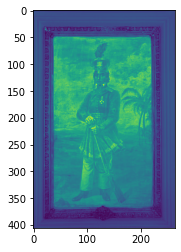

Imagem 1: <class 'numpy.ndarray'>
(406, 264)


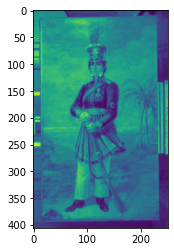

Imagem 2: <class 'numpy.ndarray'>
(406, 251)


In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# ler duas imagens
img1 = cv.imread('uv20161004rosael-8_reduzida_para_257.jpg', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('quiteriaIR_reduzida_para_257.jpg', cv.IMREAD_GRAYSCALE)

# Mostrar as duas imagens e informações delas
plt.imshow(img1),plt.show() 
print('Imagem 1:', type(img1))
print(img1.shape)

plt.imshow(img2),plt.show()
print('Imagem 2:', type(img2))
print(img2.shape)

![imagem1](C:\Users\Samara\Documents\Python Scripts\new_codes\imagens_maria_quiteria\uv20161004rosael-8_reduzida_para_257.jpg)
![imagem2](C:\Users\Samara\Documents\Python Scripts\new_codes\imagens_que_deram_origem_a_array_selecionado_para_autoencoder\quiteriaIR_reduzida_para_257.jpg)

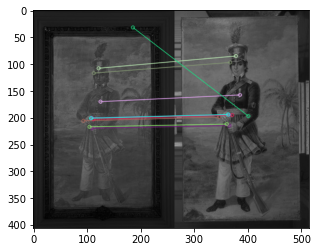

Matches: <class 'PIL.Image.Image'>


In [2]:
# Dar o ORB nelas
orb = cv.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Dar o Brute Force Matcher e os descriptors bf.Match(des1, des2)
bf = cv.BFMatcher (cv.NORM_HAMMING, crossCheck = True)
matches = bf.match(des1, des2)

# Ordena-os por distância
matches = sorted(matches, key = lambda x:x.distance)

# Cria variáveis com uma das dimensões do tamanho do número de matches 
matches = matches[:int(len(matches)*90)]
no_of_matches = len(matches)
p1 = np.zeros((no_of_matches, 2))
p2 = np.zeros((no_of_matches, 2))

# Atribui o queryIdx dos kp1 dos matches da img1 à variável p1 e os trainIdx da img2 (à variável p2)
for i in range(len(matches)):
    p1[i, :] = kp1[matches[i].queryIdx].pt
    p2[i, :] = kp2[matches[i].trainIdx].pt
    
# Cria máscara, homografia e através delas cria uma imagem transformada da img1 com o alinhamento da img2
homography, mask = cv.findHomography(p1, p2, cv.RANSAC)
transformed_img = cv.warpPerspective(img1, homography, (264,406))
cv.imwrite('imagem_transformada.jpg', transformed_img)
                                     
# Desenha os 10 primeiros matches, salva e mostra as informações
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()
img3 = Image.fromarray(img3)
img3.save('img3.png', format = 'PNG')
print('Matches:', type(img3))

![imagem3](C:\Users\Samara\Documents\Python Scripts\new_codes\img3.png)

Após alinhadas as imagens, saberíamos que os pixelsets de uma correspondem à mesma região de pintura dos pixelsets da outra. Assim, poderíamos extrair informações de cada pixelset das duas imagens e tratá-las conjuntamente.

Porém o alinhamento ainda não está sendo realizado da maneira correta, conforme observado na imagem abaixo:

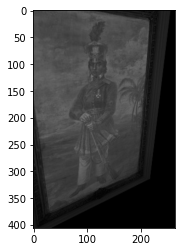

Imagem transformada: <class 'numpy.ndarray'>
(406, 264, 3)


In [3]:
# Mostra imagem transformada e suas informações
img_transformada = cv.imread('imagem_transformada.jpg')
plt.imshow(img_transformada),plt.show()
print('Imagem transformada:', type(img_transformada))
print(img_transformada.shape)